In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('loan_data.csv')

In [6]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

Here are what the columns represents:

*'credit.policy':1 if the customer meets the credit underwriting criteria of LendingClib.com, 
0 otherwise.

*'purpose': the purpose of the loan (takes values 'credit_card','debt_consolidation','education','major purchase','small_bussiness' and'all others')

*'int.rate':the interest rate of the loan, as a prportion (a rate 11% would be stored as 0.11).borrowers jugded by LendingClub.com to be more risky are assigned higher interest rates. 

*'installment': The monhly installments owed by the borrower if the loan is funded

*'log.annual.inc': the natural log og the self-repoted income of the borrower

*'dti': The debt to income ratio of the borrower(amount of debt divivded by annual income).

*'fico':The FICO credit score of the borrower.

*'days.with.cr.line':The number of days the borrower has had a credit line.

*'revol.bal':The borrowers revolving balance(amount unpaid at the end of the credit card billing cycle

*'revol.util':The borrowers revolving line utilization rate(the amount of the credit line used relative to total credit available) 

*'inq.last.6mths':The borrowers number of inquiries by creditors in the last six month.

*'delinq.2yrs':The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

*'pub.rec':The borrower's number of derogatory public records(bankruptcy fillings, tax liens, or judgements.

**'not.fully.paid':The column we are going to predict

In [7]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
df.tail(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.0,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.0,37879,57.0,6,0,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [10]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [11]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

Text(0.5,0,'FICO')

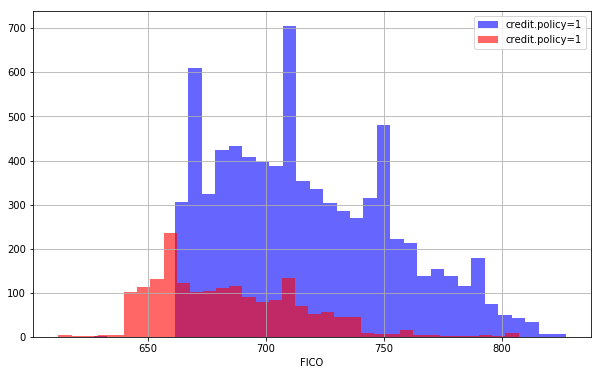

In [12]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(color='blue',bins=35,
                                        label='credit.policy=1',alpha=0.6)         
df[df['credit.policy']==0]['fico'].hist(color='red',bins=35,
                                        label='credit.policy=1',alpha=0.6)
plt.legend()
plt.xlabel('FICO')

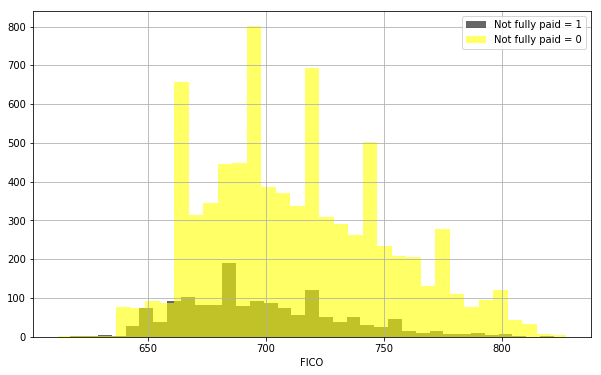

In [13]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(color='black',bins=35,
                                         label='Not fully paid = 1',alpha=0.6)
df[df['not.fully.paid']==0]['fico'].hist(color='yellow',bins=35,
                                         label='Not fully paid = 0',alpha=0.6)
plt.legend()
plt.xlabel('FICO')
plt.savefig('Analysis.png')

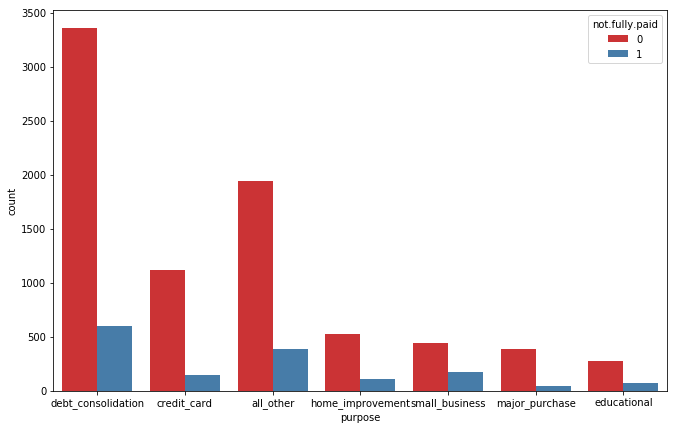

In [14]:
plt.figure(figsize=(11,7))
sns.countplot(data=df,x='purpose',hue=df['not.fully.paid'],palette='Set1')

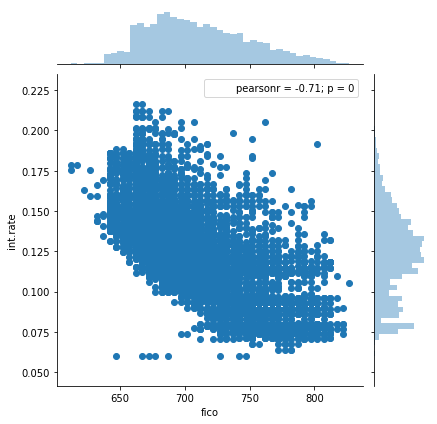

In [15]:
sns.jointplot(x=df['fico'],y=df['int.rate'],kind='scatter')

<Figure size 792x504 with 0 Axes>

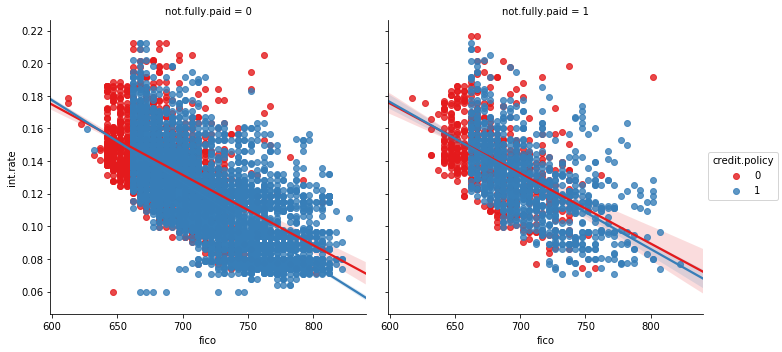

In [16]:
plt.figure(figsize=(11,7))
sns.lmplot(data=df,x='fico',y='int.rate',hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [17]:
cat_feats = ['purpose']

In [18]:
final_result = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [19]:
final_result.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [20]:
#from sklearn.cross_validation import train_test_split

In [21]:
X = final_result.drop('not.fully.paid',axis=1)
y = final_result['not.fully.paid']

In [22]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
std = StandardScaler()

In [25]:
X = std.fit_transform(final_result)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# DecisionTreeClassifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtc = DecisionTreeClassifier()

In [30]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
dtc_pred = dtc.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [58]:
print(classification_report(y_test,dtc_pred))
print('\n')
print(confusion_matrix(y_test,dtc_pred))
print('\n')
print(accuracy_score(y_test,dtc_pred)*100,'%')

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2406
          1       1.00      1.00      1.00       468

avg / total       1.00      1.00      1.00      2874



[[2406    0]
 [   0  468]]


100.0 %


# RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier(n_estimators=300)

In [36]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
rfc_pred = rfc.predict(X_test)

In [57]:
print(classification_report(y_test,rfc_pred))
print('\n')
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(accuracy_score(y_test,rfc_pred)*100,'%')

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2406
          1       1.00      1.00      1.00       468

avg / total       1.00      1.00      1.00      2874



[[2406    0]
 [   0  468]]


100.0 %


# IsolatonForest

In [39]:
from sklearn.ensemble import IsolationForest

In [40]:
iso = IsolationForest()

In [41]:
iso.fit(X_train,y_train)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [42]:
iso_pred = iso.predict(X_test)

In [56]:
print(classification_report(y_test,iso_pred))
print('\n')
print(confusion_matrix(y_test,iso_pred))
print('\n')
print(accuracy_score(y_test,iso_pred)*100,'%')

             precision    recall  f1-score   support

         -1       0.00      0.00      0.00         0
          0       0.00      0.00      0.00      2406
          1       0.13      0.70      0.21       468

avg / total       0.02      0.11      0.03      2874



[[   0    0    0]
 [ 143    0 2263]
 [ 142    0  326]]


11.343075852470424 %


MAY BE LESS ACCURACY IS BECAUSE OF A CLASSIFICATION PROBLEM

# LogisticRegression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr = LogisticRegression()

In [46]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
lr_pred = lr.predict(X_test)

In [55]:
print(classification_report(y_test,lr_pred))
print('\n')
print(confusion_matrix(y_test,lr_pred))
print('\n')
print(accuracy_score(y_test,lr_pred)*100,'%')

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2406
          1       1.00      1.00      1.00       468

avg / total       1.00      1.00      1.00      2874



[[2406    0]
 [   0  468]]


100.0 %


# KNeighborsClassifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier()

In [51]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [52]:
knn_pred = knn.predict(X_test)

In [54]:
print(classification_report(y_test,knn_pred))
print('\n')
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(accuracy_score(y_test,knn_pred)*100,'%')

             precision    recall  f1-score   support

          0       0.99      1.00      1.00      2406
          1       1.00      0.97      0.98       468

avg / total       0.99      0.99      0.99      2874



[[2405    1]
 [  14  454]]


99.47807933194154 %
